In [1]:
#The first thing we need to do is import the packages needed for the entire assignment
import textblob as tb
import numpy as np
import pandas as pd
import nltk as nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from pathlib import Path
from textblob import TextBlob
from operator import itemgetter
from pathlib import Path
import urllib
from urllib.request import urlopen
import requests
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\coleb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#Just for fun, comparing my last paper to one of the earliest I can find
from pathlib import Path
from textatistic import Textatistic

distxt = requests.get('https://raw.githubusercontent.com/Cbhami/Coraline/master/NLP/NLP%20Dissertation/Dissertation.txt')

Diss = distxt.text #I need to read in my txt

firsttxt = requests.get('https://raw.githubusercontent.com/Cbhami/Coraline/master/NLP/NLP%20Dissertation/Paper2010.txt')

First = firsttxt.text #I need to read in my txt

readability_first = Textatistic(First)
readability_diss = Textatistic(Diss)

%precision 3
readability_first.dict()
readability_diss.dict()

{'char_count': 249937,
 'word_count': 40728,
 'sent_count': 3282,
 'sybl_count': 70593,
 'notdalechall_count': 18389,
 'polysyblword_count': 8793,
 'flesch_score': 47.604,
 'fleschkincaid_score': 9.702,
 'gunningfog_score': 13.600,
 'smog_score': 12.480,
 'dalechall_score': 11.381}

In [8]:
import spacy #import the large spaCY package
nlp_lg = spacy.load('en_core_web_lg') 
document4 =nlp_lg(Diss)  #converting my dissertation to a txt file_extension
document5 = nlp_lg(First)

In [9]:
docsim=document4.similarity(document5)
print(f'First Paper (2010) to Final Dissertation (2021) similarity is {docsim:.3}.')

First Paper (2010) to Final Dissertation (2021) similarity is 0.934.


In [10]:
dissblob = TextBlob(Diss)
dissblob.word_counts

defaultdict(int,
            {'a': 603,
             'phenomenological': 73,
             'study': 86,
             'of': 1154,
             'positive': 210,
             'and': 1522,
             'effective': 204,
             'leadership�s': 5,
             'influence': 60,
             'on': 235,
             'success': 135,
             'in': 607,
             'iowa': 204,
             'army': 385,
             'recruiting': 408,
             'companies': 198,
             'dissertation': 30,
             'manuscript': 3,
             'submitted': 2,
             'to': 1135,
             'northcentral': 7,
             'university': 12,
             'school': 3,
             'business': 18,
             'partial': 2,
             'fulfillment': 2,
             'the': 2338,
             'requirements': 13,
             'for': 280,
             'degree': 4,
             'doctor': 1,
             'philosophy': 1,
             'by': 114,
             'cole': 3,
             'barrett': 

In [11]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english') 

In [36]:
custom_stop_word_list=['recruiting', 'Army','Recruiter','Station Commander', 'Commander', 'Recruiters']

In [37]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#Loading Stopwords into a list
NLTK_stop_words_list=stopwords.words('english')
print(NLTK_stop_words_list)
print("Total numbers of stop words are ")
print(len(NLTK_stop_words_list))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\coleb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
final_stopword_list = custom_stop_word_list + NLTK_stop_words_list

In [39]:
# Import package
import matplotlib.pyplot as plt
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

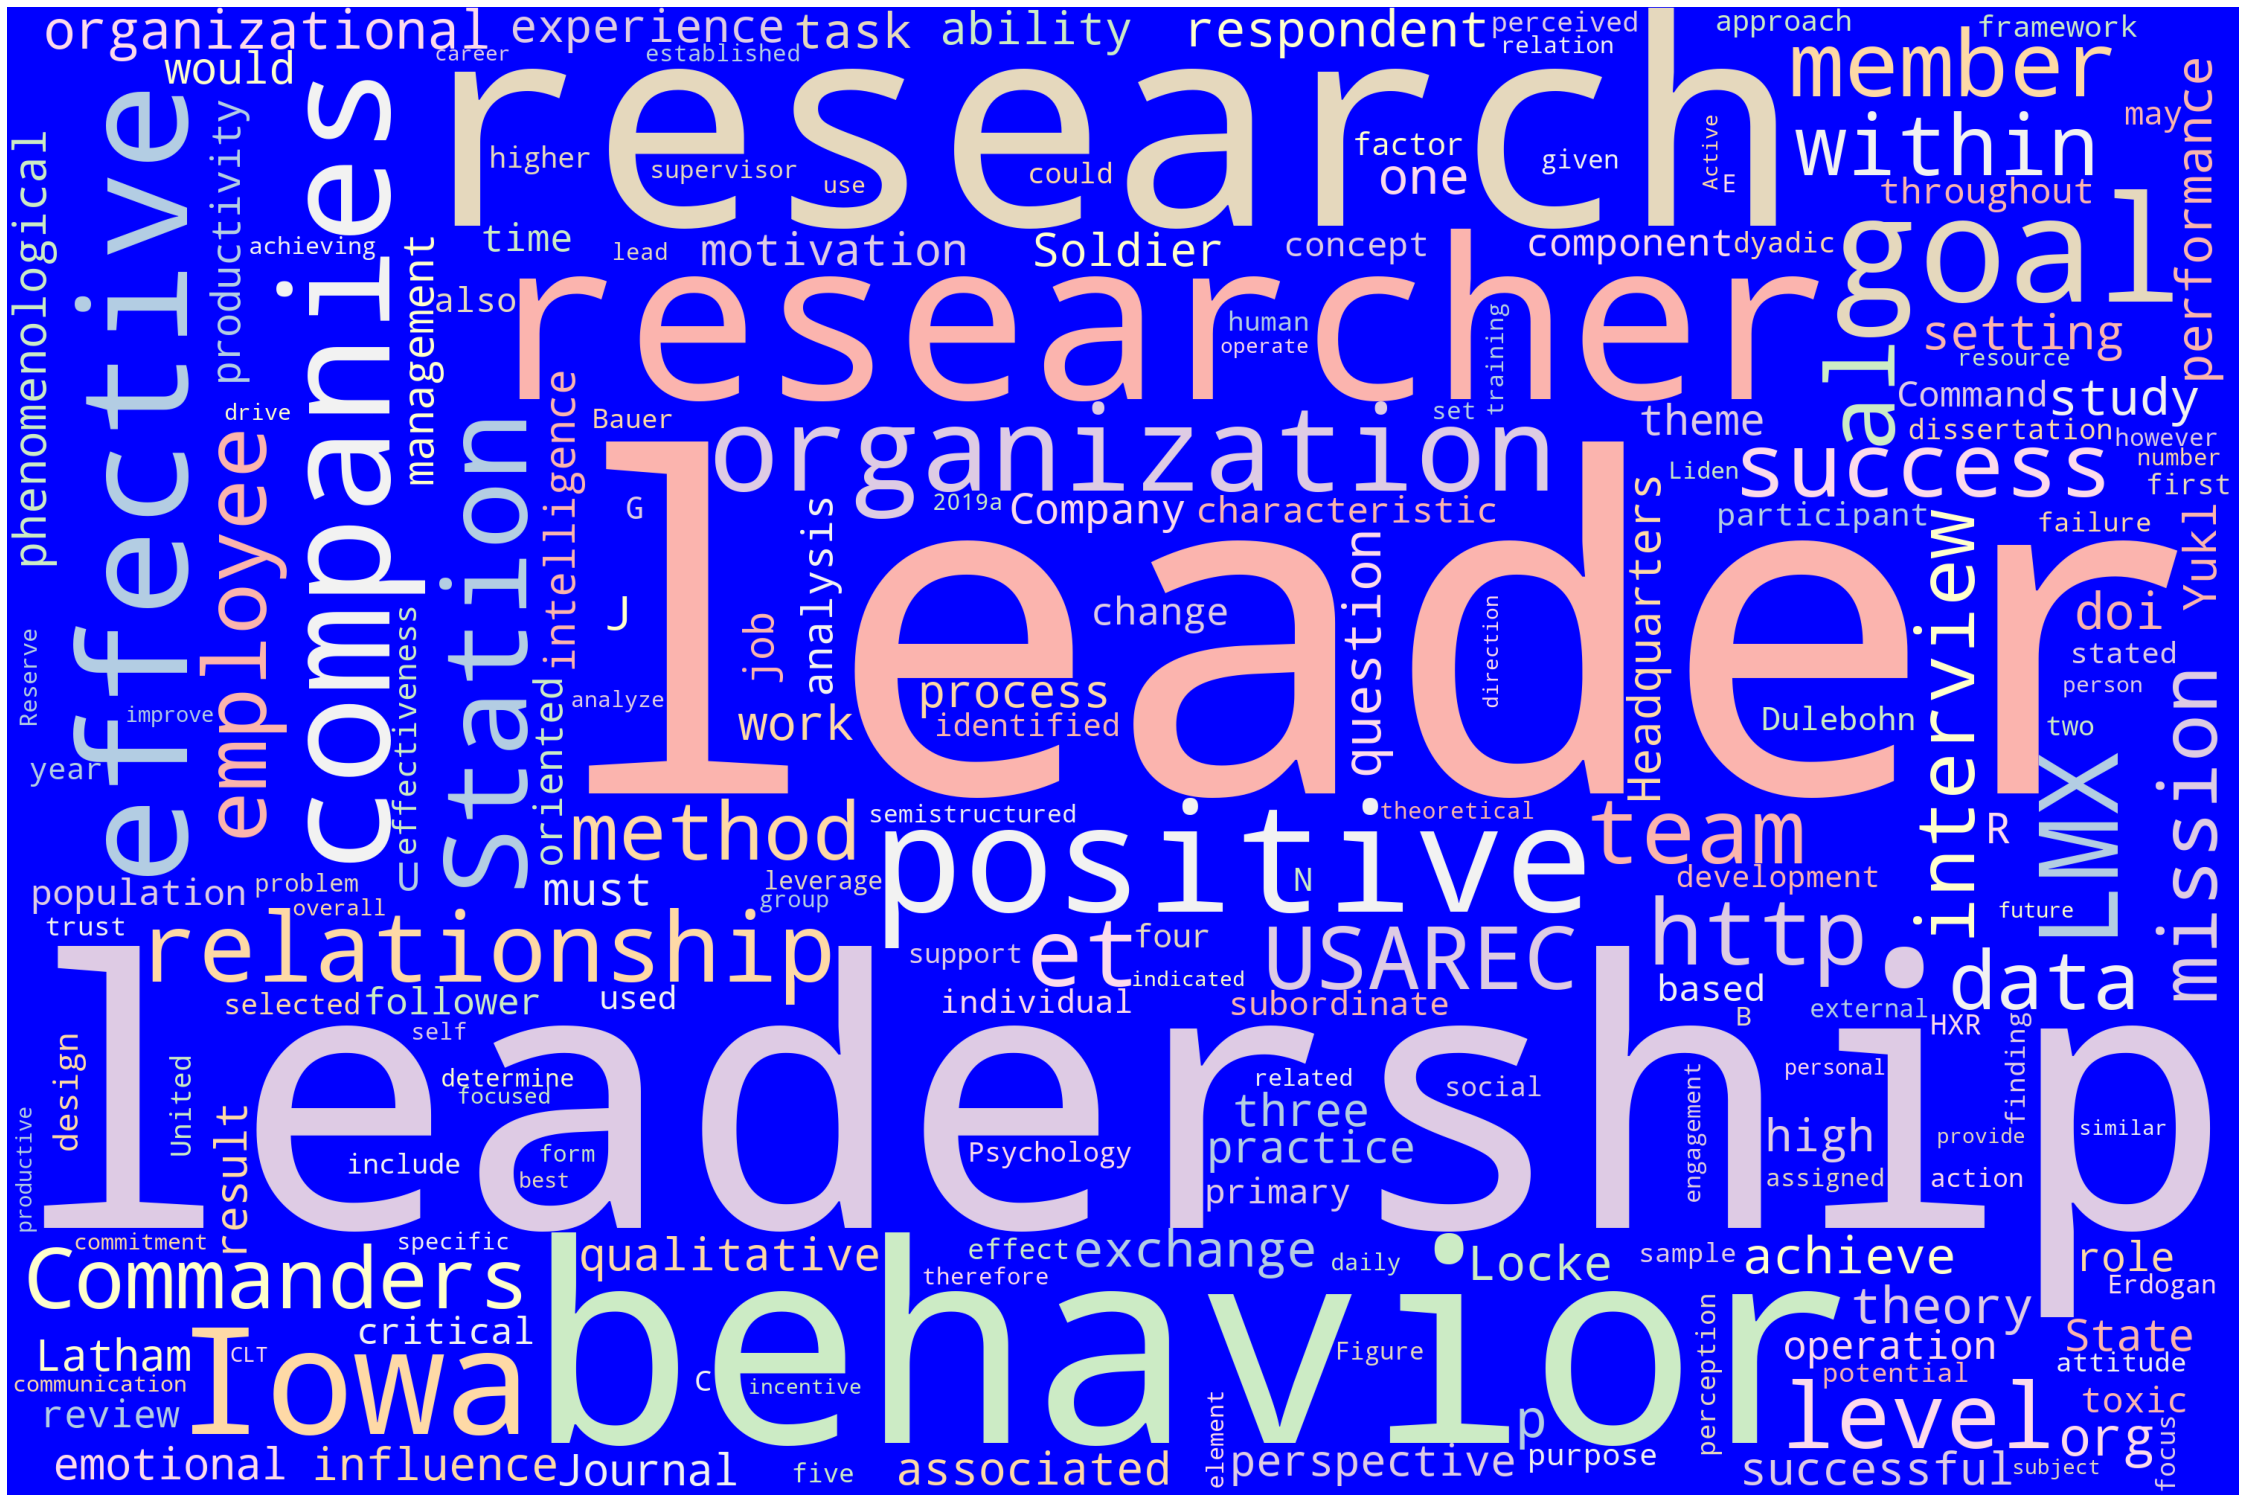

In [42]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='blue', colormap='Pastel1', collocations=False, stopwords = final_stopword_list).generate(Diss)
# Plot
plot_cloud(wordcloud)

In [15]:
items2 = dissblob.word_counts.items()    #Here we assign the word count
#print(items1)
print(len(items2))

4731


In [16]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english') #We're looking specifically for English stop words
items = [item for item in items2 if item[0] not in stopwords]
df = pd.DataFrame(items2,columns = ['Word','Count']) 
df.sort_values(by='Count', ascending=False)
#print(stopwords)

,Word,Count
26,the,2338
5,and,1522
3,of,1154
19,to,1135
11,in,607
...,...,...
2889,lmx-md,1
2888,models,1
2885,partners�,1
2883,participant�s,1


In [17]:
items = [item for item in items if item[0] not in final_stopword_list]
print(len(items))

4610


In [18]:
sorted_diss = sorted(items, key=itemgetter(1), reverse=True)

In [19]:
stopwords1 = ['“', '”', '’', '...', '.', ',', '-', '‘', 'Army Recruiting', 'Army', 'Iowa Army', 'recruiting']
sorted_diss2 = [pair for pair in sorted_diss if pair[0] not in final_stopword_list]
print(len(sorted_diss2))
#print(sorted_diss2)

4610


In [20]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud   
import imageio

In [22]:
diss3 = imageio.imread('Python.png')

In [47]:
wordcloud = WordCloud(width=1000, height=1000, 
    colormap='prism', max_words = 100, mask=diss3, background_color='white')

In [24]:
from pathlib import Path
DissertationText = Diss

In [49]:
#Disstext2 = [item for item in DissertationText if item[0] not in stopwords]
stopwords22 = ['Army Recruiting', 'Army']
#DT2 = [words for words in DissertationText if words not in stopwords22]
        
Diss_wordcloud = wordcloud.generate(Diss)

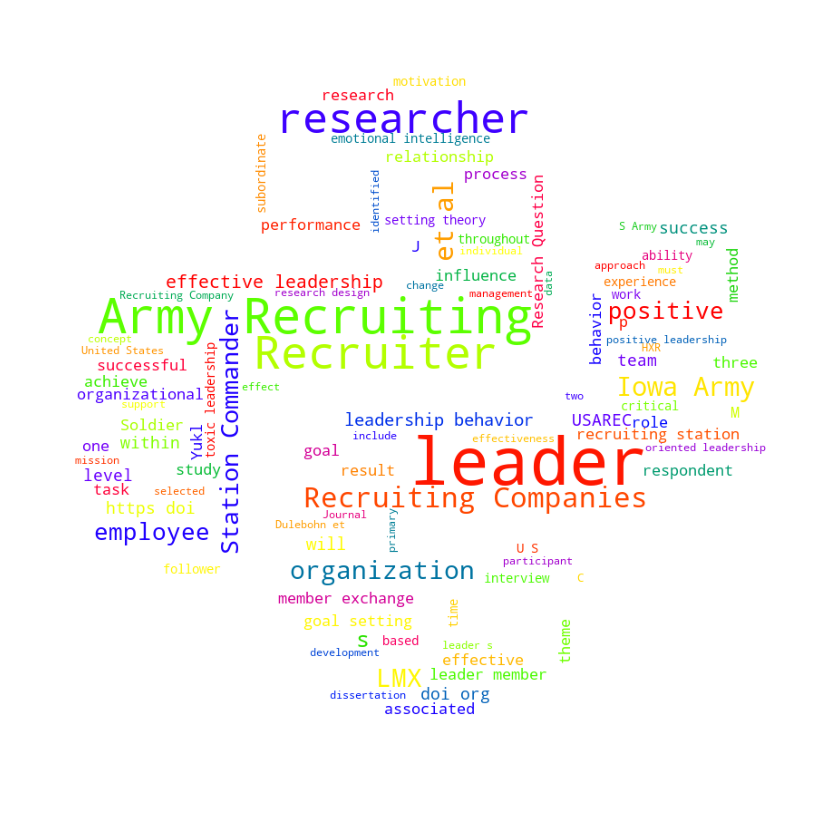

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(Diss_wordcloud)

## Textatistics

In [57]:
import pandas as pd
from textatistic import Textatistic
textatistic_first = First
textatistic_diss = Diss

readability_first = Textatistic(textatistic_first)
readability_diss = Textatistic(textatistic_diss)

%precision 3
readability_first.dict()
readability_diss.dict()

first_df = pd.DataFrame([readability_first.dict()]) 
diss_df = pd.DataFrame([readability_diss.dict()]) 
print(first_df)
print(diss_df)

   char_count  word_count  sent_count  sybl_count  notdalechall_count  \
0        4576         969          89        1227                 168   

   polysyblword_count  flesch_score  fleschkincaid_score  gunningfog_score  \
0                  44     88.658968             3.597975          6.171362   

   smog_score  dalechall_score  
0    7.145864         6.914112  
   char_count  word_count  sent_count  sybl_count  notdalechall_count  \
0      249937       40728        3282       70593               18389   

   polysyblword_count  flesch_score  fleschkincaid_score  gunningfog_score  \
0                8793     47.603921             9.702403          13.59963   

   smog_score  dalechall_score  
0   12.479801        11.381316  


In [59]:
diss_df['Title'] = 'Values'
diss_dfp = pd.pivot_table(diss_df, columns = 'Title').astype(float).round(2)
diss_dfp

Title,Values
char_count,249937.00
dalechall_score,11.38
flesch_score,47.60
fleschkincaid_score,9.70
gunningfog_score,13.60
notdalechall_count,18389.00
polysyblword_count,8793.00
sent_count,3282.00
smog_score,12.48
sybl_count,70593.00


In [60]:
first_df['Title'] = 'Values'
first_dfp = pd.pivot_table (first_df, columns = 'Title').astype(float).round(2)
diss_dfp['Values'] = diss_dfp['Values'].round(2)
first_dfp.head(13)

Title,Values
char_count,4576.00
dalechall_score,6.91
flesch_score,88.66
fleschkincaid_score,3.60
gunningfog_score,6.17
notdalechall_count,168.00
polysyblword_count,44.00
sent_count,89.00
smog_score,7.15
sybl_count,1227.00


In [61]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

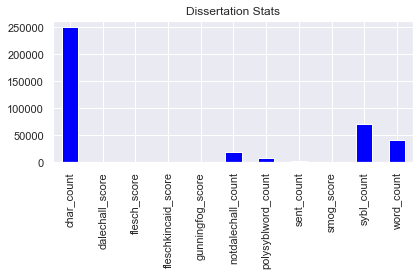

In [62]:
sns.set()
diss_dfp.plot.bar(color = 'blue', legend=False)
#diss_dfp.set_xticklabels(rotation=0)
plt.title('Dissertation Stats')
plt.gcf().tight_layout()

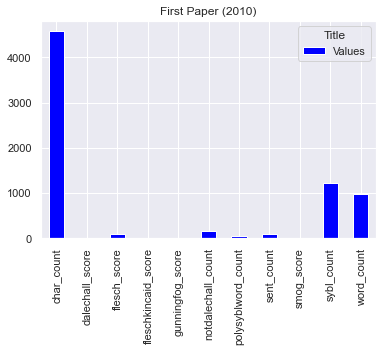

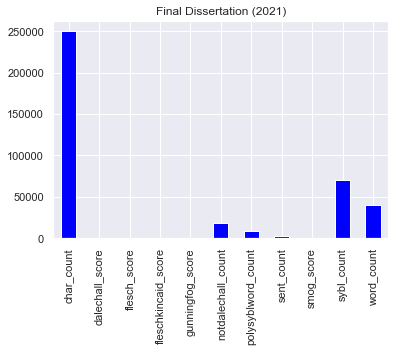

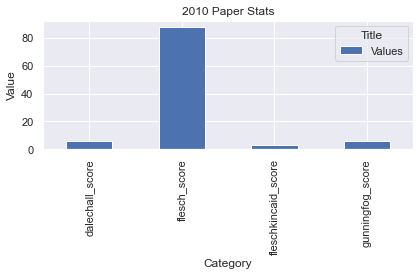

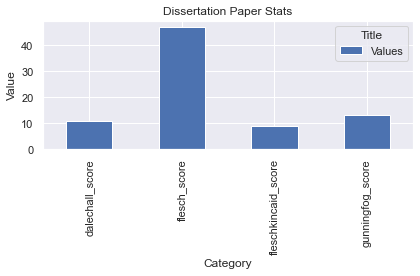

In [56]:
ax1 = first_dfp.plot.bar(color='blue', legend=True, title='First Paper (2010)')
ax2 = diss_dfp.plot.bar(color = 'blue', legend=False, title='Final Dissertation (2021)')


fig = first_dfp[1:5].plot(kind='bar')
fig.set_title('Amount Frequency')
fig.set_xlabel('Category')
fig.set_ylabel('Value')
#t
plt.title('2010 Paper Stats')
ax3 = plt.gcf().tight_layout()

fig = diss_dfp[1:5].plot(kind='bar')
fig.set_title('Amount Frequency')
fig.set_xlabel('Category')
fig.set_ylabel('Value')
plt.title('Dissertation Paper Stats')
ax4 = plt.gcf().tight_layout()